# 인터넷 자료 수집 (웹 크롤링, Web Crawling, scraping)
#### 1. requests : json : 동적페이지(URL 변경 없이 데이터를 수정 및 추가)  $\leftarrow$ 오늘 도전 과제
#### 2. requests : html : 정적페이지(URL 변경으로 데이터를 수정 및 추가) $\leftarrow$ 다음주 BeautifulSoup과 Mixing 하여 활용
#### 3. selenium : web browser : 1, 2번 방법을 사용하지 못할때 사용  $\leftarrow$  크롤링의 끝판왕

# 타겟 시스템: www.naver.com 주식 데이터 수집
- 코스피 데이터 수집
- 코스닥 데이터 수집
- 시각화 해보기

#### 일반적인 웹 크롤링 순서
- 1. 타겟 시스템(웹 서비스 구조) 분석 : URL 분석
- 2. request, response 하기 : json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱) 후 pandas DataFrame 생성
- 4. 다양한 방식으로 분석

# requests 모듈
- 웹 브라우저 주소창에 입력하여 결과를 받아오는 일을 대신 해주는 모듈
- 코딩에서 크롬과 같은 역할을 담당
- 유용한 블로그
    - https://hongku.tistory.com/292
    - https://dgkim5360.tistory.com/entry/python-requests
- 설치
    - pip3 install requests # Python3
    - pip  install requests # Python2, 윈도우의 경우 Python3 포함
## `Python3.8+` 부터 공식 지원 (빌트인)

In [1]:
#!pip3 install requests

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import requests

# 1. Naver 주식 정보 서비스 분석 : URL 분석
## 1.1 웹 구조 확인
### 네이버 포털 $\to$ 금융 $\to$ 국내 증시
### 모바일 페이지 활용: 심플하고 간단한 구조 $\to$ https://m.stock.naver.com/
### 국내 $\to$ 코스피 메뉴로 이동
### 더보기 버튼 $\to$ URL 변경 안됨 $\to$ 내용 바뀌어도 주소는 유지 $\to$ 동적 페이지 $\to$ requests + json 활용을 고려
- "일별 변동" 더보기 버튼 누를 때마다 추가되는 트래픽 관찰
- 데이터일 것 같은 트래픽 
- 헤더 보기: 구조 확인 
#### https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=2


## 1.1 코스피 (KOSPI) 데이터 수집

In [96]:
# url = "https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=2"
# url = "https://m.stock.naver.com/api/stocks/marketValue/KOSPI?page=1&pageSize=100"
url = "https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=2"
print(url)

https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=2


- URL 조작

In [100]:
market = 'KOSPI'
page =1
pageSize = 60

# url = f"https://m.stock.naver.com/api/stocks/marketValue/{market}?page={page}&pageSize={pageSize}"
# url = f"https://m.stock.naver.com/api/index/{market}/price?pageSize={pageSize}&page={page}"

url = f"https://m.stock.naver.com/api/index/{market}/price?pageSize={pageSize}&page={page}"

print(url)

https://m.stock.naver.com/api/index/KOSPI/price?pageSize=60&page=1


In [101]:
respones = requests.get(url)

In [102]:
respones.text

'[{"localTradedAt":"2024-11-15","closePrice":"2,432.55","compareToPreviousClosePrice":"13.69","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.57","openPrice":"2,413.05","highPrice":"2,432.78","lowPrice":"2,390.56"},{"localTradedAt":"2024-11-14","closePrice":"2,418.86","compareToPreviousClosePrice":"1.78","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.07","openPrice":"2,430.26","highPrice":"2,441.43","lowPrice":"2,410.93"},{"localTradedAt":"2024-11-13","closePrice":"2,417.08","compareToPreviousClosePrice":"-65.49","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-2.64","openPrice":"2,468.27","highPrice":"2,478.87","lowPrice":"2,415.77"},{"localTradedAt":"2024-11-12","closePrice":"2,482.57","compareToPreviousClosePrice":"-49.09","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-1.94","openPrice":"2,527.94","highPrice":"2,532.44",

In [107]:
kospi = respones.json()

In [105]:
# kospi = data['stocks']

TypeError: list indices must be integers or slices, not str

In [108]:
kospi

[{'localTradedAt': '2024-11-15',
  'closePrice': '2,432.55',
  'compareToPreviousClosePrice': '13.69',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.57',
  'openPrice': '2,413.05',
  'highPrice': '2,432.78',
  'lowPrice': '2,390.56'},
 {'localTradedAt': '2024-11-14',
  'closePrice': '2,418.86',
  'compareToPreviousClosePrice': '1.78',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.07',
  'openPrice': '2,430.26',
  'highPrice': '2,441.43',
  'lowPrice': '2,410.93'},
 {'localTradedAt': '2024-11-13',
  'closePrice': '2,417.08',
  'compareToPreviousClosePrice': '-65.49',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-2.64',
  'openPrice': '2,468.27',
  'highPrice': '2,478.87',
  'lowPrice': '2,415.77'},
 {'localTradedAt': '2024-11-12',
  'closePrice': '2,482.57',
  'compareToPreviousClosePrice': '-49.09',
  'compareToPreviousPric

In [109]:
# kospi_df = pd.DataFrame(data['stocks'])
kospi_df = pd.DataFrame(data)

In [111]:
kospi_df.tail(3)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
57,2024-08-20,"2,696.63",22.27,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.83,"2,699.74","2,706.05","2,686.06"
58,2024-08-19,"2,674.36",-22.87,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.85,"2,697.97","2,699.84","2,664.28"
59,2024-08-16,"2,697.23",52.73,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.99,"2,695.49","2,699.61","2,680.74"


In [112]:
kospi_data = kospi_df[['localTradedAt', 'closePrice']]

In [113]:
kospi_data.tail(3)

,localTradedAt,closePrice
57,2024-08-20,"2,696.63"
58,2024-08-19,"2,674.36"
59,2024-08-16,"2,697.23"


In [42]:
# data['stocks']

[{'stockType': 'domestic',
  'stockEndType': 'stock',
  'itemCode': '005930',
  'reutersCode': '005930',
  'stockName': '삼성전자',
  'sosok': '0',
  'closePrice': '53,900',
  'compareToPreviousClosePrice': '4,000',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '8.02',
  'accumulatedTradingVolume': '32,460,860',
  'accumulatedTradingValue': '1,699,488',
  'accumulatedTradingValueKrwHangeul': '1조 6,995억원',
  'localTradedAt': '2024-11-15T13:05:51+09:00',
  'marketValue': '3,217,713',
  'marketValueHangeul': '321조 7,713억원',
  'nav': 'N/A',
  'threeMonthEarningRate': 'N/A',
  'marketStatus': 'OPEN',
  'tradeStopType': {'code': '1', 'text': '운영.Trading', 'name': 'TRADING'},
  'stockExchangeType': {'code': 'KS',
   'zoneId': 'Asia/Seoul',
   'nationType': 'KOR',
   'delayTime': 0,
   'startTime': '0900',
   'endTime': '1530',
   'closePriceSendTime': '1630',
   'nameKor': '코스피',
   'nameEng': 'KOSPI',
   'stockType': 'domestic',
   'nationCode'

In [34]:
import pandas as pd

In [114]:
# kospi_df = pd.DataFrame(data['stocks'])
# kospi_df = pd.DataFrame(kospi_data)

In [115]:
# kospi_df.tail(3)

,localTradedAt,closePrice
57,2024-08-20,"2,696.63"
58,2024-08-19,"2,674.36"
59,2024-08-16,"2,697.23"


In [47]:
kospi_df[['localTradedAt', 'closePrice']]

,localTradedAt,closePrice
0,2024-11-15T13:05:51+09:00,"53,900"
1,2024-11-15T13:05:59+09:00,"177,500"
2,2024-11-15T13:05:50+09:00,"380,000"
3,2024-11-15T13:05:15+09:00,"939,000"
4,2024-11-15T13:05:54+09:00,"205,500"
5,2024-11-15T13:05:52+09:00,"45,900"
6,2024-11-15T13:05:51+09:00,"91,800"
7,2024-11-15T13:05:52+09:00,"165,000"
8,2024-11-15T13:05:51+09:00,"89,200"
9,2024-11-15T13:05:32+09:00,"189,900"


## 1.2 코스닥 (KOSDAQ) 데이터 수집

In [116]:
market = 'KOSDAQ'
page =1
pageSize = 60

# url = f"https://m.stock.naver.com/api/stocks/marketValue/{market}?page={page}&pageSize={pageSize}"
# url = f"https://m.stock.naver.com/api/index/{market}/price?pageSize={pageSize}&page={page}"

url = f"https://m.stock.naver.com/api/index/{market}/price?pageSize={pageSize}&page={page}"

print(url)

https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=60&page=1


In [13]:
# market = 'KOSDAQ'
# pageSize = 50
# page =1

# url = f"https://m.stock.naver.com/api/index/{market}/price?pageSize={pageSize}&page={page}"
# print(url)

https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=50&page=1


In [117]:
response = requests.get(url)

In [118]:
data = response.json()

In [119]:
data

[{'localTradedAt': '2024-11-15',
  'closePrice': '686.95',
  'compareToPreviousClosePrice': '5.39',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.79',
  'openPrice': '675.64',
  'highPrice': '688.91',
  'lowPrice': '668.38'},
 {'localTradedAt': '2024-11-14',
  'closePrice': '681.56',
  'compareToPreviousClosePrice': '-8.09',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-1.17',
  'openPrice': '694.16',
  'highPrice': '702.08',
  'lowPrice': '681.30'},
 {'localTradedAt': '2024-11-13',
  'closePrice': '689.65',
  'compareToPreviousClosePrice': '-20.87',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-2.94',
  'openPrice': '708.52',
  'highPrice': '712.83',
  'lowPrice': '689.64'},
 {'localTradedAt': '2024-11-12',
  'closePrice': '710.52',
  'compareToPreviousClosePrice': '-18.32',
  'compareToPreviousPrice': {'code': '5', 'text'

In [64]:
# data['stocks']

[{'stockType': 'domestic',
  'stockEndType': 'stock',
  'itemCode': '196170',
  'reutersCode': '196170',
  'stockName': '알테오젠',
  'sosok': '1',
  'closePrice': '440,000',
  'compareToPreviousClosePrice': '-1,500',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.34',
  'accumulatedTradingVolume': '317,154',
  'accumulatedTradingValue': '139,503',
  'accumulatedTradingValueKrwHangeul': '1,395억원',
  'localTradedAt': '2024-11-15T13:23:21+09:00',
  'marketValue': '234,603',
  'marketValueHangeul': '23조 4,603억원',
  'nav': 'N/A',
  'threeMonthEarningRate': 'N/A',
  'marketStatus': 'OPEN',
  'tradeStopType': {'code': '1', 'text': '운영.Trading', 'name': 'TRADING'},
  'stockExchangeType': {'code': 'KQ',
   'zoneId': 'Asia/Seoul',
   'nationType': 'KOR',
   'delayTime': 0,
   'startTime': '0900',
   'endTime': '1530',
   'closePriceSendTime': '1630',
   'nameKor': '코스닥',
   'nameEng': 'KOSDAQ',
   'stockType': 'domestic',
   'nationCode': 'KOR

In [22]:
# data

{'stockListSortType': 'MARKET_VALUE',
 'stockListCategoryType': 'KOSPI',
 'stocks': [{'stockType': 'domestic',
   'stockEndType': 'stock',
   'itemCode': '005930',
   'reutersCode': '005930',
   'stockName': '삼성전자',
   'sosok': '0',
   'closePrice': '53,900',
   'compareToPreviousClosePrice': '4,000',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '8.02',
   'accumulatedTradingVolume': '31,172,716',
   'accumulatedTradingValue': '1,629,935',
   'accumulatedTradingValueKrwHangeul': '1조 6,299억원',
   'localTradedAt': '2024-11-15T12:53:19+09:00',
   'marketValue': '3,217,713',
   'marketValueHangeul': '321조 7,713억원',
   'nav': 'N/A',
   'threeMonthEarningRate': 'N/A',
   'marketStatus': 'OPEN',
   'tradeStopType': {'code': '1', 'text': '운영.Trading', 'name': 'TRADING'},
   'stockExchangeType': {'code': 'KS',
    'zoneId': 'Asia/Seoul',
    'nationType': 'KOR',
    'delayTime': 0,
    'startTime': '0900',
    'endTime': '1530',
    'closeP

In [23]:
# stocks = data['stocks']

In [24]:
# stocks

[{'stockType': 'domestic',
  'stockEndType': 'stock',
  'itemCode': '005930',
  'reutersCode': '005930',
  'stockName': '삼성전자',
  'sosok': '0',
  'closePrice': '53,900',
  'compareToPreviousClosePrice': '4,000',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '8.02',
  'accumulatedTradingVolume': '31,172,716',
  'accumulatedTradingValue': '1,629,935',
  'accumulatedTradingValueKrwHangeul': '1조 6,299억원',
  'localTradedAt': '2024-11-15T12:53:19+09:00',
  'marketValue': '3,217,713',
  'marketValueHangeul': '321조 7,713억원',
  'nav': 'N/A',
  'threeMonthEarningRate': 'N/A',
  'marketStatus': 'OPEN',
  'tradeStopType': {'code': '1', 'text': '운영.Trading', 'name': 'TRADING'},
  'stockExchangeType': {'code': 'KS',
   'zoneId': 'Asia/Seoul',
   'nationType': 'KOR',
   'delayTime': 0,
   'startTime': '0900',
   'endTime': '1530',
   'closePriceSendTime': '1630',
   'nameKor': '코스피',
   'nameEng': 'KOSPI',
   'stockType': 'domestic',
   'nationCode'

In [120]:
# kosdaq_df = pd.DataFrame(data['stocks'])
kosdaq_df = pd.DataFrame(data)

In [121]:
kosdaq_df.tail(3)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
57,2024-08-20,787.44,9.97,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.28,783.73,787.95,783.35
58,2024-08-19,777.47,-8.86,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.13,787.32,788.79,776.71
59,2024-08-16,786.33,9.50,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.22,787.34,788.86,783.88


In [122]:
kosdaq_df = kosdaq_df[['localTradedAt', 'closePrice']]

In [124]:
kosdaq_df.tail(3)

,localTradedAt,closePrice
57,2024-08-20,787.44
58,2024-08-19,777.47
59,2024-08-16,786.33


# 2. 시각화 해보기

## 2.1 수집된 2가지 데이터를 시각화
- 그래프로 그려봐야 변동량을 해석하기 쉽다.
- Magic Command 확인해 보기 (전체 목록)
    - %lsmagic
    - `%matplotlib` 포함되어 있는지 확인

In [73]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %

In [74]:
%matplotlib inline

In [75]:
import matplotlib.pyplot as plt

### 만약 `import` 에러가 난다면 `matplotlib` 설치

In [27]:
# 로컬 설치 -> 에러 발생
# import matplotlib as mpl
!pip install matplotlib

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [29]:
# 우분투 전역으로 설치
!sudo apt install python3-matplotlib -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-matplotlib is already the newest version (3.6.3-1ubuntu5).
python3-matplotlib set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [ ]:
# 설치가 끝났으면 다시 import 시도
# import matplotlib as mpl
import matplotlib.pyplot as plt

In [82]:
kospi_df = kospi_df[['localTradedAt', 'closePrice']]

In [125]:
kospi_df.head(5)

,localTradedAt,closePrice
0,2024-11-15,"2,432.55"
1,2024-11-14,"2,418.86"
2,2024-11-13,"2,417.08"
3,2024-11-12,"2,482.57"
4,2024-11-11,"2,531.66"


In [126]:
kosdaq_df.head(5)

,localTradedAt,closePrice
0,2024-11-15,686.95
1,2024-11-14,681.56
2,2024-11-13,689.65
3,2024-11-12,710.52
4,2024-11-11,728.84


In [127]:
kospi_df['closePrice'].head(2)

0    2,432.55
1    2,418.86
Name: closePrice, dtype: object

- 문자열 처리

In [31]:
kospi_df['closePrice'].head(3)

0    2,425.63
1    2,417.08
2    2,482.57
Name: closePrice, dtype: object

In [88]:
# kospi_df['closePrice'].apply(lambda x: x.replace(',', '')).apply(pd.to_numeric).tail(2)

48    114500
49    202000
Name: closePrice, dtype: int64

In [33]:
# kosdaq_df['closePrice'].apply(lambda x: x.replace(',', '')).apply(pd.to_numeric)

0     691.08
1     689.65
2     710.52
3     728.84
4     743.38
5     733.52
6     743.31
7     751.81
8     754.08
9     729.05
10    743.06
11    738.19
12    744.18
13    740.48
14    727.41
15    734.59
16    745.19
17    738.34
18    759.95
19    753.22
20    765.06
21    765.79
22    773.81
23    770.26
24    770.98
25    775.48
26    778.24
27    781.01
28    768.98
29    762.13
30    763.88
31    774.49
32    779.18
33    759.30
34    767.35
35    755.12
36    748.33
37    739.51
38    733.20
39    731.03
40    709.42
41    706.20
42    714.46
43    706.59
44    725.28
45    731.75
46    760.37
47    769.21
48    767.66
49    756.04
Name: closePrice, dtype: float64

In [128]:
df_kospi_price = kospi_df['closePrice'].apply(lambda x: x.replace(',', '')).apply(pd.to_numeric)
df_kosdaq_price = kosdaq_df['closePrice'].apply(lambda x: x.replace(',', '')).apply(pd.to_numeric)

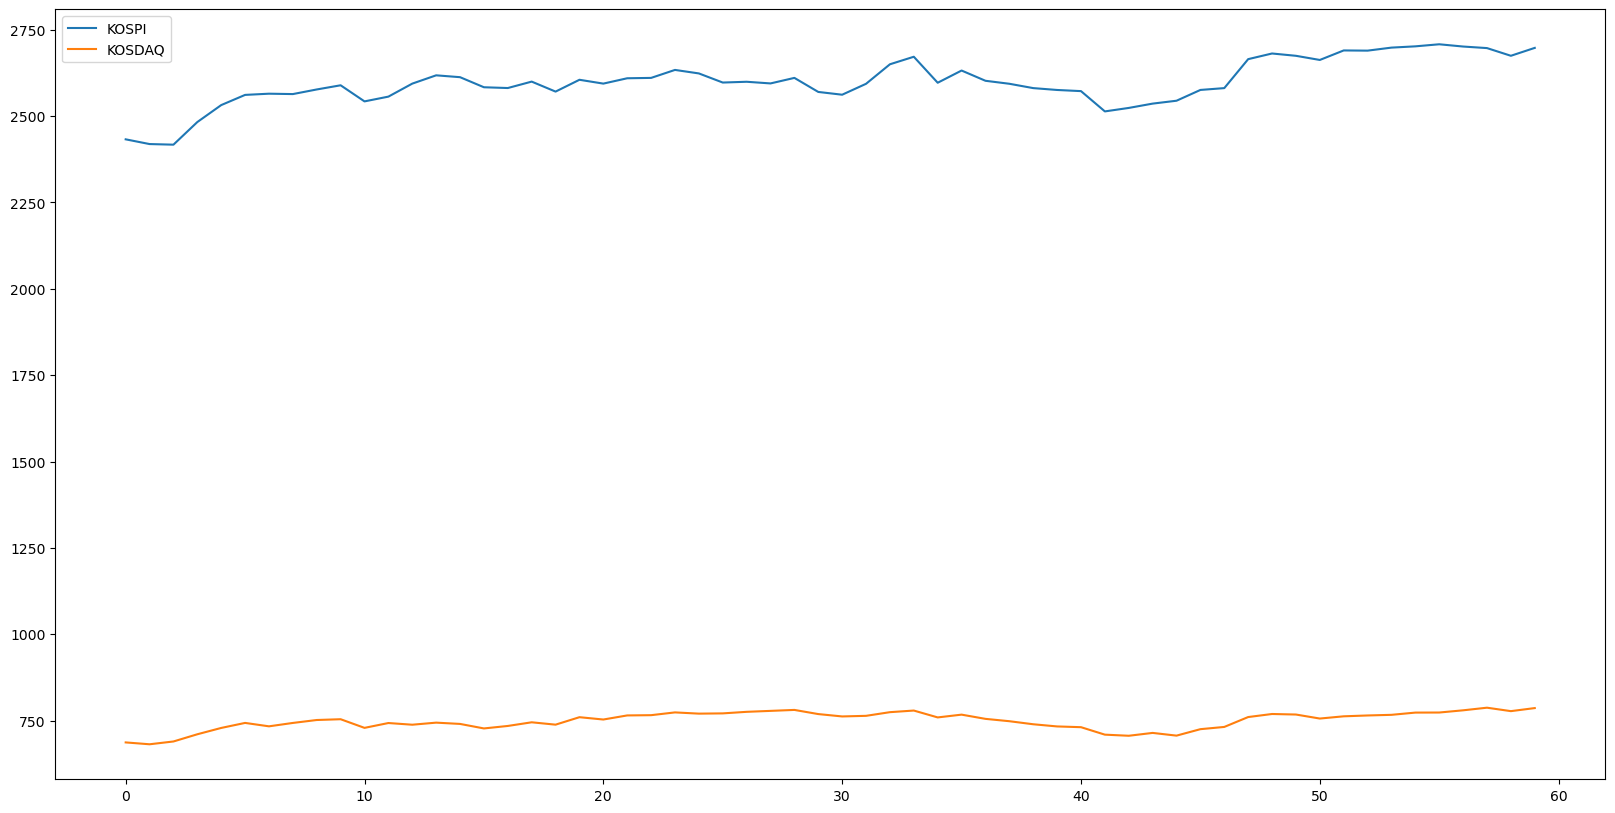

In [132]:
# 코스피, 코스닥 주가 변동 그래프
plt.figure(figsize=(20, 10))

# x_kospi = kospi_df['localTradedAt']
# y_kospi = df_kospi_price.to_list()
# x_kospi = kospi_df['localTradedAt'].to_numpy()
x_kospi = list(range(len(kospi_df['localTradedAt'])))
y_kospi = df_kospi_price.to_numpy()


# x_kosdaq = kosdaq_df['localTradedAt']
# y_kosdaq = df_kosdaq_price.to_list()
# x_kosdaq = kosdaq_df['localTradedAt'].to_numpy()
# y_kosdaq = df_kosdaq_price.to_numpy()
x_kosdaq = list(range(len(kosdaq_df['localTradedAt'])))
y_kosdaq= df_kosdaq_price.to_numpy()


plt.plot(x_kospi, y_kospi, label='KOSPI')
plt.plot(x_kospi, y_kosdaq, label='KOSDAQ')
plt.legend(loc=0)
plt.show()

## 2.2 정규화 해보기 (Nomalization)
- 일반적으로 사용하는 정규화 공식: `z = (x - min(x)) / (max(x) - min(x))`
- 우리는 sklearn 모듈을 임포트 해서 사용합니다.
- sklearn 패키지 설치: https://scikit-learn.org/stable/install.html

### Devian/Ubuntu 전역으로 `sklearn` 설치
[scikit learn 공식 문서](https://scikit-learn.org/stable/install.html#debian-ubuntu)

In [43]:
# !pip3 install -U scikit-learn
!sudo apt-get install python3-sklearn python3-sklearn-lib -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-iniconfig python3-joblib python3-pluggy python3-pytest
  python3-simplejson python3-threadpoolctl
Suggested packages:
  python3-dap python-sklearn-doc
The following NEW packages will be installed:
  python3-iniconfig python3-joblib python3-pluggy python3-pytest
  python3-simplejson python3-sklearn python3-sklearn-lib python3-threadpoolctl
0 upgraded, 8 newly installed, 0 to remove and 17 not upgraded.
Need to get 6671 kB of archives.
After this operation, 37.6 MB of additional disk space will be used.
Get:1 http://ap-northeast-2.ec2.archive.ubuntu.com/ubuntu noble/universe amd64 python3-iniconfig all 1.1.1-2 [6024 B]
Get:2 http://ap-northeast-2.ec2.archive.ubuntu.com/ubuntu noble/universe amd64 python3-joblib all 1.3.2-1 [207 kB]
Get:3 http://ap-northeast-2.ec2.archive.ubuntu.com/ubuntu noble/universe amd64 python3-pluggy all 1.

In [133]:
from sklearn import preprocessing

In [135]:
kospi_normalized = preprocessing.minmax_scale(y_kospi)
kosdaq_normalized = preprocessing.minmax_scale(y_kosdaq)

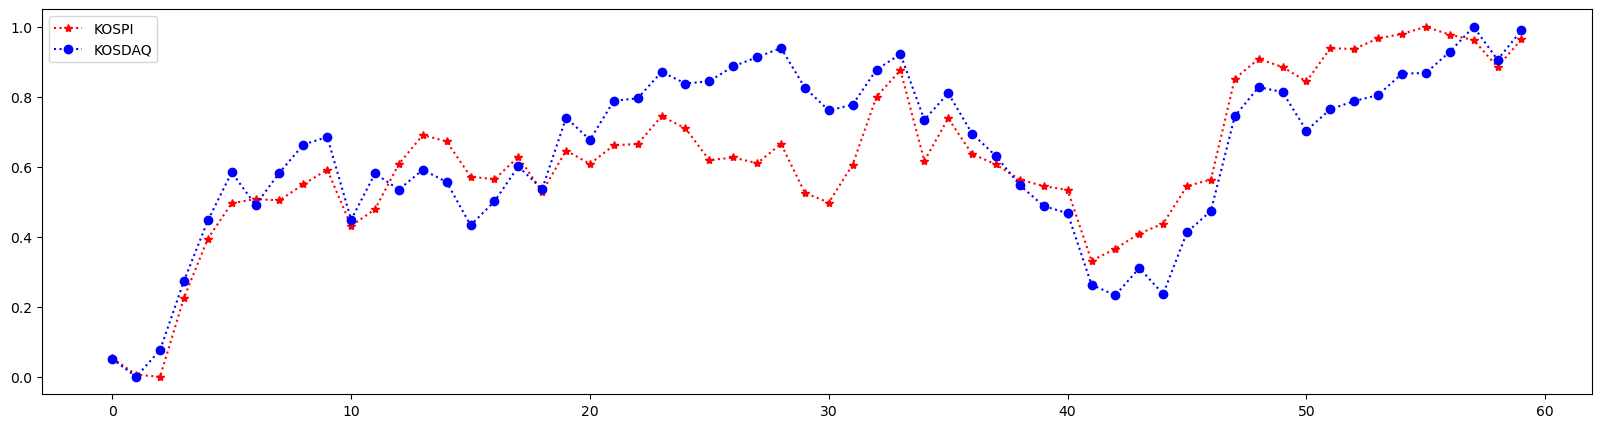

In [136]:
plt.figure(figsize=(20, 5))

plt.plot(x_kospi, kospi_normalized,  "r*:", label="KOSPI")
plt.plot(x_kosdaq, kosdaq_normalized, "bo:", label="KOSDAQ")
plt.legend(loc=0)

plt.show()

## 2.3 상관계수 알아보기
- 상관계수 해석
    - 1 : 완전히 동일한 방향으로 움직임
    - 0 : 전혀 연관성이 없음
    - -1 : 완전히 반대 방향으로 움직임

In [138]:
import numpy as np

In [139]:
coef = np.corrcoef(kospi_normalized, kosdaq_normalized)[0, 1] * 100

In [140]:
print(f'코스닥과 코스피의 상관관계는 {coef:2.2f}%입니다.')

코스닥과 코스피의 상관관계는 85.80%입니다.
